In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.metrics import r2_score
import joblib

In [3]:
df=pd.read_csv('Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

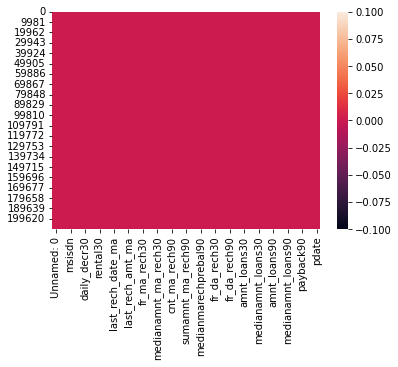

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['msisdn', 'pcircle', 'pdate']

 ['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']


In [9]:
for col in cf:
    print(df[col].value_counts(),'\n')

04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64 

UPW    209593
Name: pcircle, dtype: int64 

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64 



In [10]:
for col in nf:
    print(col,' : ',df[col].nunique())

Unnamed: 0  :  209593
label  :  2
aon  :  4507
daily_decr30  :  147025
daily_decr90  :  158669
rental30  :  132148
rental90  :  141033
last_rech_date_ma  :  1186
last_rech_date_da  :  1174
last_rech_amt_ma  :  70
cnt_ma_rech30  :  71
fr_ma_rech30  :  1083
sumamnt_ma_rech30  :  15141
medianamnt_ma_rech30  :  510
medianmarechprebal30  :  30428
cnt_ma_rech90  :  110
fr_ma_rech90  :  89
sumamnt_ma_rech90  :  31771
medianamnt_ma_rech90  :  608
medianmarechprebal90  :  29785
cnt_da_rech30  :  1066
fr_da_rech30  :  1072
cnt_da_rech90  :  27
fr_da_rech90  :  46
cnt_loans30  :  40
amnt_loans30  :  48
maxamnt_loans30  :  1050
medianamnt_loans30  :  6
cnt_loans90  :  1110
amnt_loans90  :  69
maxamnt_loans90  :  3
medianamnt_loans90  :  6
payback30  :  1363
payback90  :  2381


In [11]:
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


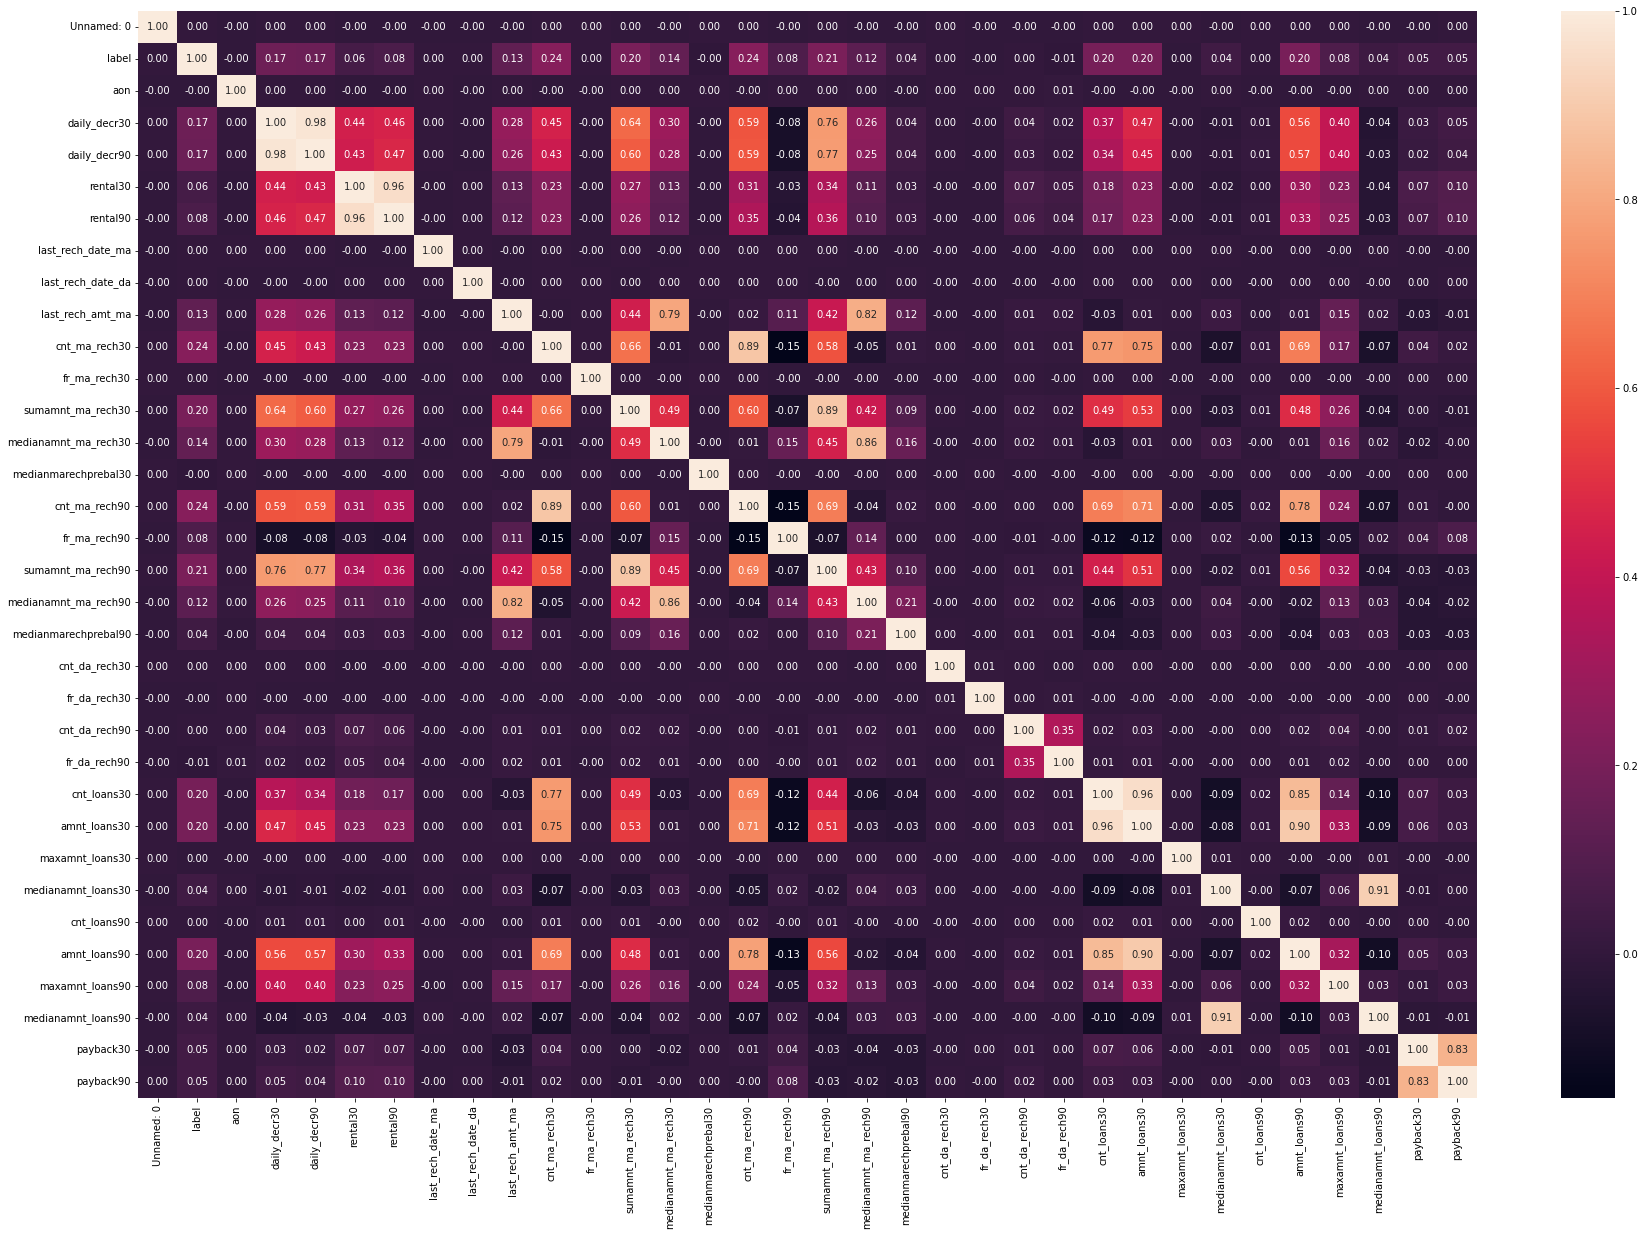

In [12]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [13]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [14]:
df=df.drop(columns=['Unnamed: 0', 'msisdn','pdate', 'pcircle','last_rech_date_da'], axis=1)

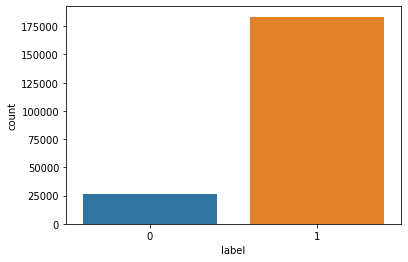

In [15]:
sns.countplot(df['label'])
plt.show()

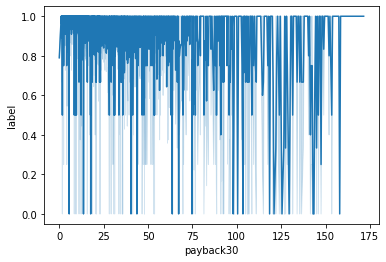

In [16]:
sns.lineplot(x='payback30',y='label',data=df) 
plt.show()

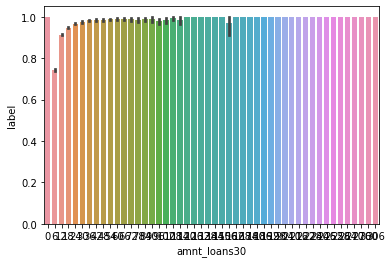

In [17]:
sns.barplot(x='amnt_loans30',y='label',data=df) 
plt.show()

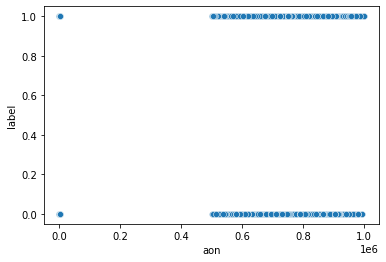

In [18]:
sns.scatterplot(x='aon',y='label',data=df) 
plt.show()

<Figure size 720x360 with 0 Axes>

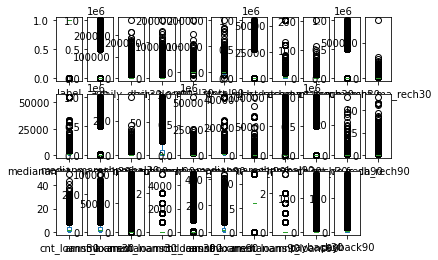

In [19]:
plt.figure(figsize=(10,5))
df.plot(kind='box',subplots=True,layout=(3,11)) 
plt.show()

In [20]:
# removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(209593, 32)
(162258, 32)


In [21]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [22]:
y=df['label']
dfx=df.drop(columns=['label'],axis=1)


aon                      0.957804
daily_decr30             1.963327
daily_decr90             2.077449
rental30                 2.195303
rental90                 2.245744
last_rech_date_ma        3.103437
last_rech_amt_ma         2.125689
cnt_ma_rech30            1.175684
fr_ma_rech30             2.004284
sumamnt_ma_rech30        1.633659
medianamnt_ma_rech30     2.326377
medianmarechprebal30    10.527616
cnt_ma_rech90            1.321787
fr_ma_rech90             1.985190
sumamnt_ma_rech90        1.707308
medianamnt_ma_rech90     2.373396
medianmarechprebal90     3.693507
cnt_da_rech30           50.518069
fr_da_rech30             0.000000
cnt_da_rech90            6.938431
fr_da_rech90             0.000000
cnt_loans30              1.466366
amnt_loans30             1.442126
maxamnt_loans30         53.601816
medianamnt_loans30       5.353154
cnt_loans90              1.709308
amnt_loans90             1.695498
maxamnt_loans90          2.681008
medianamnt_loans90       6.099916
payback30     

In [23]:
dfx.skew()

aon                      0.957804
daily_decr30             1.963327
daily_decr90             2.077449
rental30                 2.195303
rental90                 2.245744
last_rech_date_ma        3.103437
last_rech_amt_ma         2.125689
cnt_ma_rech30            1.175684
fr_ma_rech30             2.004284
sumamnt_ma_rech30        1.633659
medianamnt_ma_rech30     2.326377
medianmarechprebal30    10.527616
cnt_ma_rech90            1.321787
fr_ma_rech90             1.985190
sumamnt_ma_rech90        1.707308
medianamnt_ma_rech90     2.373396
medianmarechprebal90     3.693507
cnt_da_rech30           50.518069
fr_da_rech30             0.000000
cnt_da_rech90            6.938431
fr_da_rech90             0.000000
cnt_loans30              1.466366
amnt_loans30             1.442126
maxamnt_loans30         53.601816
medianamnt_loans30       5.353154
cnt_loans90              1.709308
amnt_loans90             1.695498
maxamnt_loans90          2.681008
medianamnt_loans90       6.099916
payback30     

In [24]:
# handling skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
d=pt.fit_transform(dfx)
d=pd.DataFrame(d,columns=dfx.columns)
x=d

In [25]:
x.skew()

aon                     0.311286
daily_decr30           -1.975842
daily_decr90           -2.103563
rental30                0.201653
rental90                0.225114
last_rech_date_ma       0.127813
last_rech_amt_ma       -0.185198
cnt_ma_rech30          -0.026466
fr_ma_rech30            0.137784
sumamnt_ma_rech30      -0.457681
medianamnt_ma_rech30   -0.313255
medianmarechprebal30    2.004243
cnt_ma_rech90          -0.029824
fr_ma_rech90            0.142904
sumamnt_ma_rech90      -0.364943
medianamnt_ma_rech90   -0.175398
medianmarechprebal90    0.994883
cnt_da_rech30           9.767796
fr_da_rech30            0.000000
cnt_da_rech90           6.938431
fr_da_rech90            0.000000
cnt_loans30             0.086399
amnt_loans30           -0.003164
maxamnt_loans30        -1.006115
medianamnt_loans30      5.353154
cnt_loans90             0.190203
amnt_loans90            0.123897
maxamnt_loans90         0.000000
medianamnt_loans90      6.099916
payback30               0.308081
payback90 

In [26]:
x.isnull().sum()

aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [27]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.712796,0.582608,0.555592,-0.625108,-0.616886,-0.364825,0.182118,-0.246098,1.704549,-0.090602,...,0.069182,-0.038420,-0.181582,-0.180707,-0.125125,-0.140440,-1.665335e-16,-0.159754,1.845681,1.882883
1,0.262472,1.309867,1.256260,0.692988,0.436232,1.435311,1.760650,-0.777215,-1.105073,0.356119,...,-0.986723,-0.038420,2.088009,-0.180707,-1.118182,-0.140440,1.512679e-15,-0.159754,-0.912797,-0.987765
2,-0.095934,0.239231,0.220811,-0.321795,-0.384821,-0.242575,0.182118,-0.777215,-1.105073,-0.483448,...,-0.986723,-0.985130,-0.181582,-0.180707,-1.118182,-1.167027,-1.665335e-16,-0.159754,-0.912797,-0.987765
3,-0.796315,-0.987510,-0.983150,-0.656433,-0.659225,3.157286,-0.221939,-1.621479,-1.105073,-1.856889,...,0.069182,-0.038420,-0.181582,-0.180707,-0.125125,-0.140440,-1.665335e-16,-0.159754,-0.912797,-0.987765
4,0.696378,-0.523201,-0.524522,-0.241195,-0.319176,-0.125864,0.582985,1.163403,0.170264,1.565448,...,1.712325,1.693039,-0.181582,-0.180707,1.361384,1.288192,-1.665335e-16,-0.159754,0.682064,0.481305


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42) 

In [29]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(108712, 31) (53546, 31)
(108712,) (53546,)


In [30]:
DT=DecisionTreeClassifier()
XGBC=GradientBoostingClassifier()
RFC=RandomForestClassifier()

In [31]:
models = []
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', XGBC))

*********************** DecisionTreeClassifier ***********************


DecisionTreeClassifier()


Accuracy_score =  0.859485302356852


Cross_Val_Score =  0.8596124422805225


roc_auc_score =  0.71752651730729


classification_report
               precision    recall  f1-score   support

           0       0.49      0.52      0.50      7342
           1       0.92      0.91      0.92     46204

    accuracy                           0.86     53546
   macro avg       0.71      0.72      0.71     53546
weighted avg       0.86      0.86      0.86     53546



[[ 3832  3510]
 [ 4014 42190]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** RandomForestClassifier ***********************


RandomForestClassifier()


Accuracy_score =  0.9075000933776566


Cross_Val_Score =  0.9075546400923626


roc_auc_score =  0.7274202186171351


classification_report
               precision    recall  f1-score   support

           0       0.76      0.48      0.59      7342
      

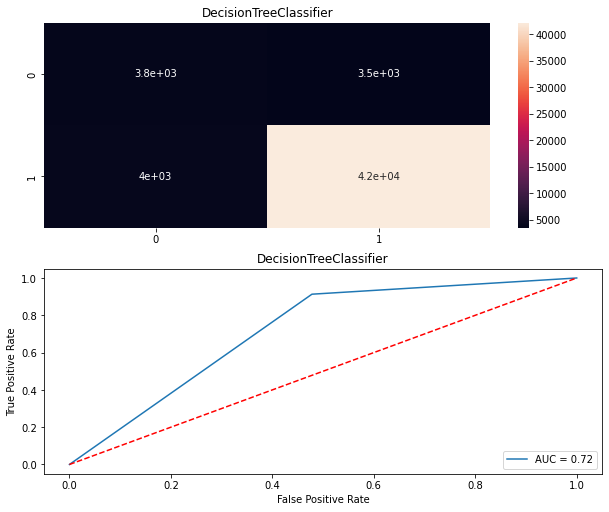

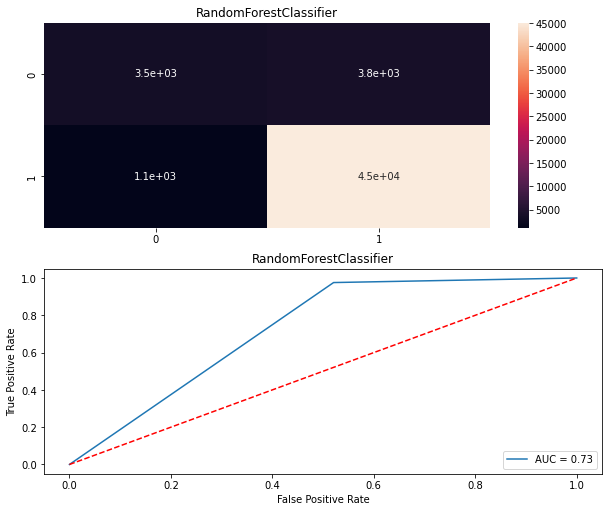

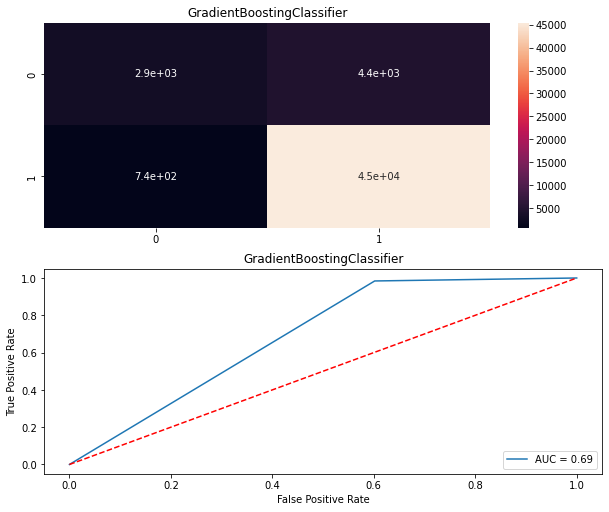

In [32]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [33]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Rou_auc_score':rocscore})
result


,Model,Accuracy_score,Cross_val_score,Rou_auc_score
0,DecisionTreeClassifier,85.948530,85.961244,71.752652
1,RandomForestClassifier,90.750009,90.755464,72.742022
2,GradientBoostingClassifier,90.372764,90.309877,69.115280


In [34]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [37]:
rfc=RandomForestClassifier(max_depth=70, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=130)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)

In [38]:
pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [39]:
y_test

75652     1
153835    0
8081      1
40753     1
78753     1
         ..
181269    1
42229     1
154865    0
180878    0
58501     1
Name: label, Length: 53546, dtype: int64

In [40]:
print( accuracy_score(y_test, pred) )

0.9096477794793262


In [41]:
joblib.dump(rfc,'mcdp.pkl')

['mcdp.pkl']

In [42]:
model=joblib.load('mcdp.pkl')

In [43]:
model.predict(x_test.head())

array([1, 0, 1, 1, 1], dtype=int64)